In [5]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
os.getcwd()

'D:\\Machine_Learning\\Regression'

In [7]:
# 데이터 불러오기
boston = pd.read_csv("./Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [8]:
# target 컬럼을 제외한 나머지 데이터를 출력
boston_data = boston.drop(['Target'], axis = 1)
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [9]:
"""
target data : 1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 : 1,000 달러)

특징 데이터
- CRIM : 범죄율
- INDUS : 비소매 상업지역 면적 비율
- NOX : 일산화질소 농도
- RM : 주택당 방 수
- LSTAT : 인구 중 하위 계층 비율
- B : 인구 중 흑인 비율
- PTRATIO : 학생/교사 비율
- ZN : 25,000 평방 피트를 초과하는 거주지역 비율
- CHAS : 찰스 강의 경계에 위치한 경우는 1, 아니면 0
-AGE : 1940년 이전에 건축된 주택의 비율
- RAD : 방사형 고속도로까지의 거리
- DIS : 직업 센터의 거리
- TAX : 재산세율
"""

'\ntarget data : 1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 : 1,000 달러)\n\n특징 데이터\n- CRIM : 범죄율\n- INDUS : 비소매 상업지역 면적 비율\n- NOX : 일산화질소 농도\n- RM : 주택당 방 수\n- LSTAT : 인구 중 하위 계층 비율\n- B : 인구 중 흑인 비율\n- PTRATIO : 학생/교사 비율\n- ZN : 25,000 평방 피트를 초과하는 거주지역 비율\n- CHAS : 찰스 강의 경계에 위치한 경우는 1, 아니면 0\n-AGE : 1940년 이전에 건축된 주택의 비율\n- RAD : 방사형 고속도로까지의 거리\n- DIS : 직업 센터의 거리\n- TAX : 재산세율\n'

In [10]:
# CRIM /RM /LSTAT 세 개의 변수로 각각 단순 선형 회귀 분석

In [11]:
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

In [12]:
# 1. target ~ crim 선형 회귀 분석

In [13]:
# crim 변수에 상수항 추가하기
crim1 = sm.add_constant(crim, has_constant="add")
crim1

D:\Anaconda3\envs\opensource\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [14]:
# sm.OLS 적합시키기
model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

In [15]:
# summary 함수를 통해 결과를 출력
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.17e-19
Time:                        14:58:14   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# 회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [17]:
fitted_model1.params[0]

24.033106174123873

In [18]:
# y_hat = beta0 + beta1 * X 계산
np.dot(crim1, fitted_model1.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [19]:
# predict 함수를 통해 yhat 구하기
pred1 = fitted_model1.predict(crim1)

In [20]:
# 직접구한 yhat과 predict 함수를 통해 구한 yhat의 차이
np.dot(crim1, fitted_model1.params) - pred1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

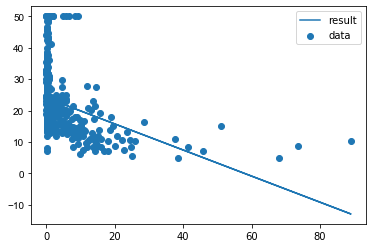

In [22]:
# 적합시킨 직선 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.yticks(fontname = "Arial")
plt.scatter(crim, target, label="data")
plt.plot(crim, pred1, label="result")
plt.legend()
plt.show()

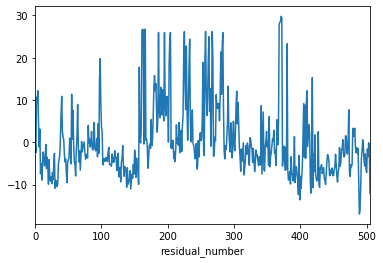

In [23]:
# residual 시각화
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [24]:
# 잔차의 합 계산
np.sum(fitted_model1.resid)

-4.263256414560601e-13